-- Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
- Choose one variable and plot that variable four different ways.
- Choose two continuous variables (distance, age and temperature), and plot them three different ways.
- Choose one continuous variable and one categorical variable (Hair color, gender, field of study), and plot them six different ways.

Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
df = pd.read_csv('Desktop/Thinkful/austin_weather.csv')

In [25]:
df['month'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d').dt.month

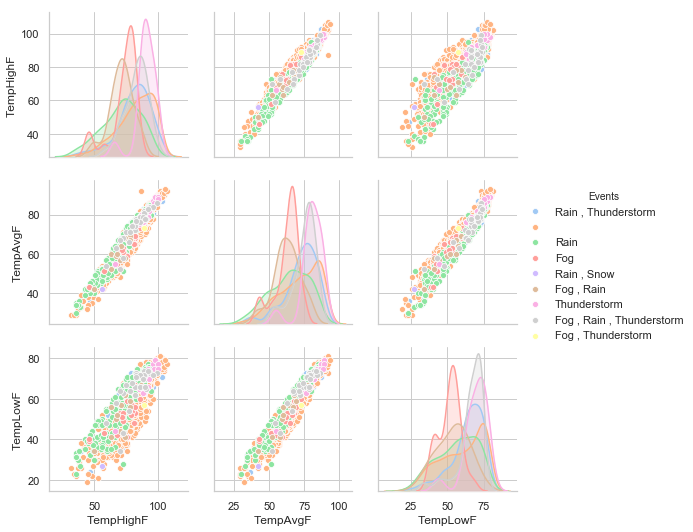

In [206]:
sns.pairplot(df, hue = 'Events')

In [26]:
df.head(10)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,year,month
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,10,7,2,20,4,31,0.46,"Rain , Thunderstorm",2013,12
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,10,10,5,16,6,25,0,,2013,12
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,10,10,10,8,3,12,0,,2013,12
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,10,10,7,12,4,20,0,,2013,12
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,10,10,7,10,2,16,T,,2013,12
5,2013-12-26,57,48,39,39,36,33,79,63,47,...,10,9,7,12,3,17,0,,2013,12
6,2013-12-27,60,53,45,41,39,37,83,65,47,...,10,9,7,7,1,11,T,,2013,12
7,2013-12-28,62,51,40,43,39,33,92,64,36,...,10,10,7,10,2,14,T,,2013,12
8,2013-12-29,64,50,36,49,41,28,92,76,60,...,10,10,4,17,5,24,0,,2013,12
9,2013-12-30,44,40,35,31,26,21,75,60,45,...,10,10,10,13,5,21,0,,2013,12


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
Date                          1319 non-null object
TempHighF                     1319 non-null int64
TempAvgF                      1319 non-null int64
TempLowF                      1319 non-null int64
DewPointHighF                 1319 non-null object
DewPointAvgF                  1319 non-null object
DewPointLowF                  1319 non-null object
HumidityHighPercent           1319 non-null object
HumidityAvgPercent            1319 non-null object
HumidityLowPercent            1319 non-null object
SeaLevelPressureHighInches    1319 non-null object
SeaLevelPressureAvgInches     1319 non-null object
SeaLevelPressureLowInches     1319 non-null object
VisibilityHighMiles           1319 non-null object
VisibilityAvgMiles            1319 non-null object
VisibilityLowMiles            1319 non-null object
WindHighMPH                   1319 non-null object
WindAvgMPH                   

In [209]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1319 rows and 21 columns


# Choose one variable (TempAvgF) and plot that variable four different ways. 

### 1. Distribution plot options "distplot"

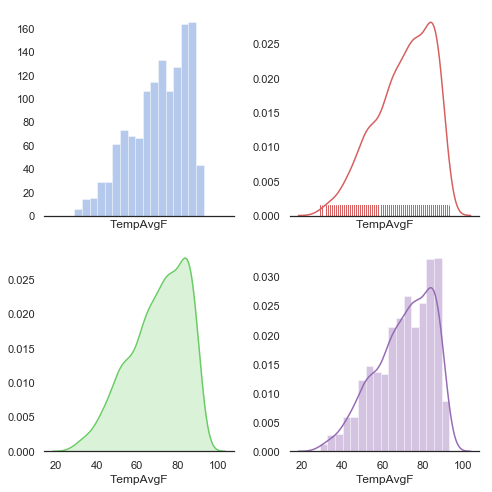

In [210]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate dataset
d = df.TempAvgF

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.tight_layout()

# Choose two continuous variables (TempAvgF, HumidityAvgPercent), and plot them three different ways.

In [8]:
df['HumidityAvgPercent'] = df['HumidityAvgPercent'].apply(lambda x: x.replace('-', '0') if '-' in str(x) else x)
df['HumidityAvgPercent'] = df['HumidityAvgPercent'].apply(lambda x: int(x))

df['DewPointAvgF'] = df['DewPointAvgF'].apply(lambda x: x.replace('-', '0') if '-' in str(x) else x)
df['DewPointAvgF'] = df['DewPointAvgF'].apply(lambda x: int(x))

df['HumidityAvgPercent'] = df['HumidityAvgPercent'].apply(lambda x: x.replace('-', '0') if '-' in str(x) else x)
df['HumidityAvgPercent'] = df['HumidityAvgPercent'].apply(lambda x: int(x))

df['SeaLevelPressureAvgInches'] = df['SeaLevelPressureAvgInches'].apply(lambda x: x.replace('-', '0') if '-' in str(x) else x)
df['SeaLevelPressureAvgInches'] = df['SeaLevelPressureAvgInches'].apply(lambda x: float(x))

df['VisibilityAvgMiles'] = df['VisibilityAvgMiles'].apply(lambda x: x.replace('-', '0') if '-' in str(x) else x)
df['VisibilityAvgMiles'] = df['VisibilityAvgMiles'].apply(lambda x: int(x))

df['HumidityAvgPercent'].head(1)

0    75
Name: HumidityAvgPercent, dtype: int64

### 1. Multiple linear regression "lmplot"

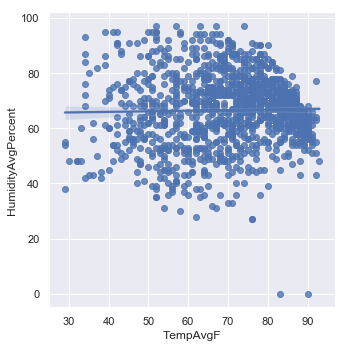

In [213]:
sns.set()
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="TempAvgF", y="HumidityAvgPercent",
               truncate=True, height=5, data=df)

# Use more informative axis labels than are provided by default
#g.set_axis_labels("TempAvgF", "HumidityAvgPercent")

### 2. Scatterplot without continuous hues and sizes

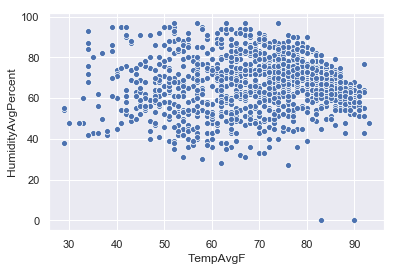

In [214]:
sns.set()


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="TempAvgF", y="HumidityAvgPercent",
                     palette=cmap, sizes=(20, 200),
                     data=df)

### 3. Emphasizing continuity with line plots

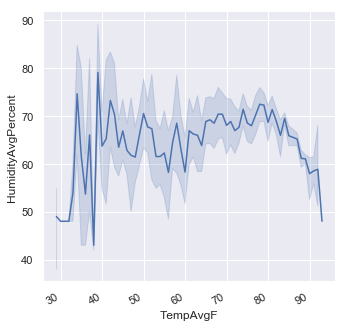

In [215]:
g = sns.relplot(x="TempAvgF", y="HumidityAvgPercent", kind="line", data=df)
g.fig.autofmt_xdate()

# Choose one continuous (HumidityAvgPercent) variable and one categorical variable (Events) , and plot them six different ways.

### 1. Grouped barplots "catplot" kind "bar"

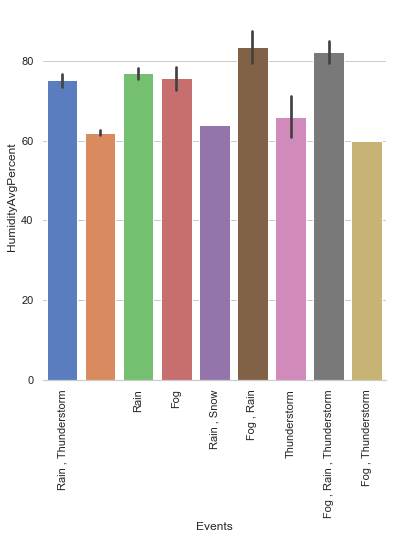

In [216]:
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Events", y="HumidityAvgPercent", data=df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)

g.set_xticklabels(rotation=90)

### 2. Grouped barplots "catplot" kind "swarm"

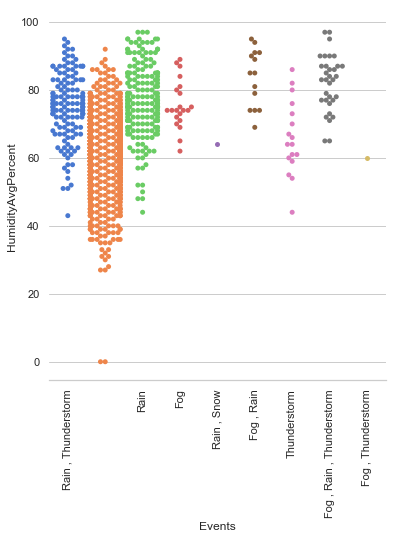

In [217]:
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Events", y="HumidityAvgPercent", data=df,
                height=6, kind="swarm", palette="muted")
g.despine(left=True)
#g.set_ylabels("survival probability")
g.set_xticklabels(rotation=90)

### 3. Grouped boxplots 

[Text(0, 0, 'Rain , Thunderstorm'),
 Text(0, 0, ' '),
 Text(0, 0, 'Rain'),
 Text(0, 0, 'Fog'),
 Text(0, 0, 'Rain , Snow'),
 Text(0, 0, 'Fog , Rain'),
 Text(0, 0, 'Thunderstorm'),
 Text(0, 0, 'Fog , Rain , Thunderstorm'),
 Text(0, 0, 'Fog , Thunderstorm')]

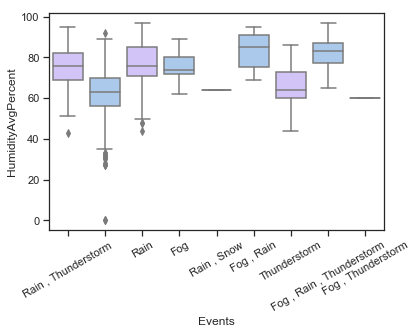

In [218]:
sns.set(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
g = sns.boxplot(x="Events", y="HumidityAvgPercent", palette=["m", "b"],
            data=df)
#g.despine(offset=10, trim=True)
g.set_xticklabels(g.get_xticklabels(),rotation=30)

### 4. Scatterplot with categorical variables 'swarmplot'

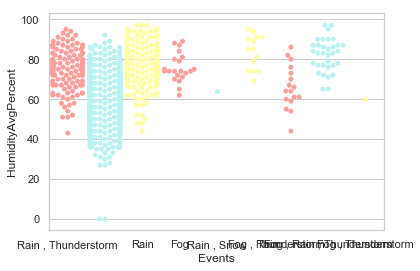

In [219]:
sns.set(style="whitegrid", palette="pastel")

sns.swarmplot(x="Events", y="HumidityAvgPercent",
              palette=["r", "c", "y"], data=df)

### 5. Violinplot from a wide-form dataset

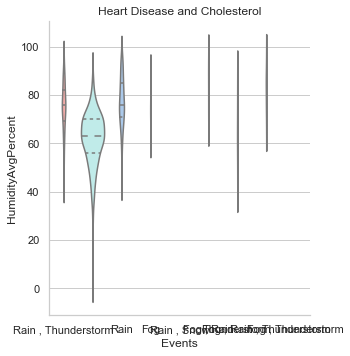

In [220]:
sns.set(style="whitegrid", palette="pastel")
sns.catplot(x="Events", y="HumidityAvgPercent",
            kind="violin",scale='count', inner='quartile', palette=["r", "c", "b"], data=df);
plt.title('Heart Disease and Cholesterol')

plt.show()

### 6. Stripplot

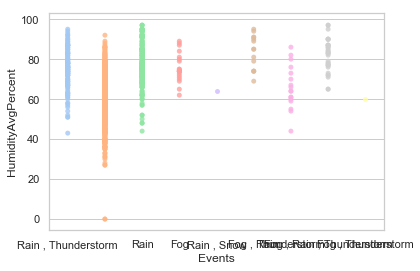

In [221]:

sns.stripplot(x="Events", y="HumidityAvgPercent",
              data=df, dodge=True, jitter=False,
              alpha=0.8, zorder=1)
plt.show()

-- Find a dataset with at least four continuous variables and one categorical variable. 
Create one master plot that gives insight into the variables and their interrelationships, including:
- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups
- Accompany your plot with a written description of what you see.

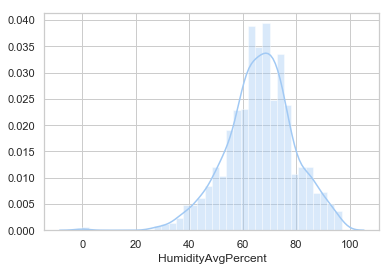

In [222]:
sns.distplot(df["HumidityAvgPercent"])

### Kernel density estimation

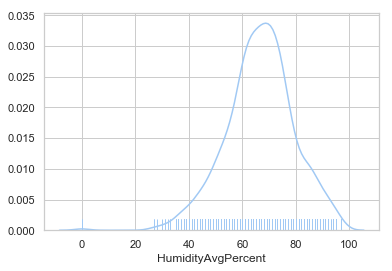

In [223]:
sns.distplot(df["HumidityAvgPercent"], hist=False, rug=True);

### Fitting parametric distributions
(to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:)

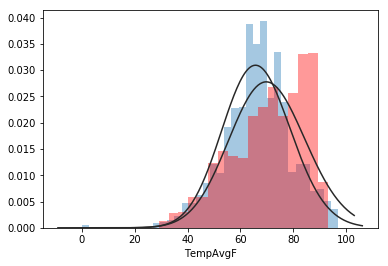

In [29]:
sns.distplot(df["HumidityAvgPercent"], kde=False, fit=stats.gamma);

sns.distplot(df["TempAvgF"], kde=False, fit=stats.gamma, color = 'red');


## Plotting bivariate distributions
TempAvgF HumidityAvgPercent SeaLevelPressureAvgInches VisibilityAvgMiles

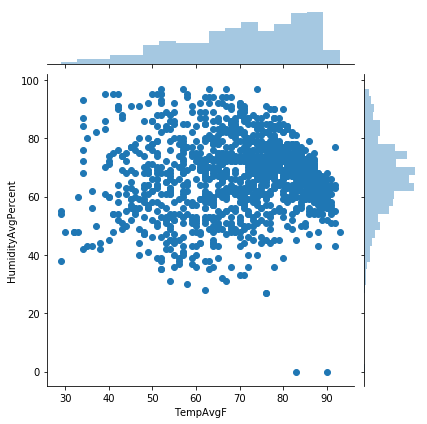

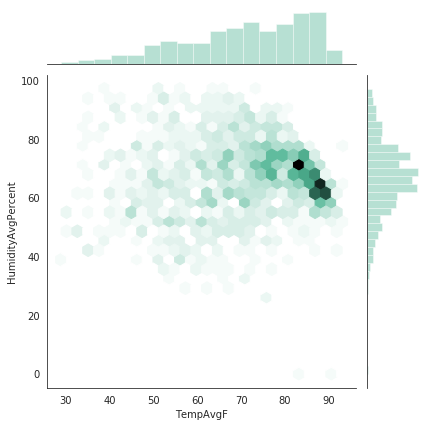

In [34]:
sns.jointplot(x="TempAvgF", y="HumidityAvgPercent", data=df);
with sns.axes_style("white"):
    sns.jointplot(x="TempAvgF", y="HumidityAvgPercent", data = df, kind="hex", color="#4CB391");
    
#we can see that the second plot shows us more information. When the temperature is in a range 80-90 the most probably 
#we can have 60-75% humidity

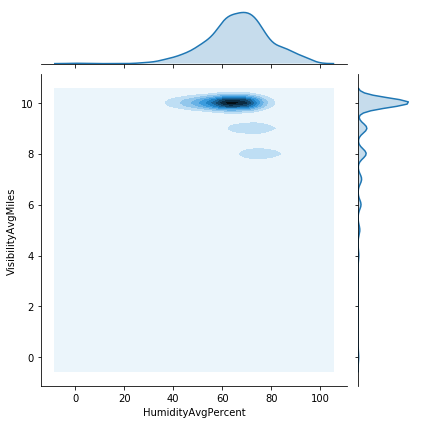

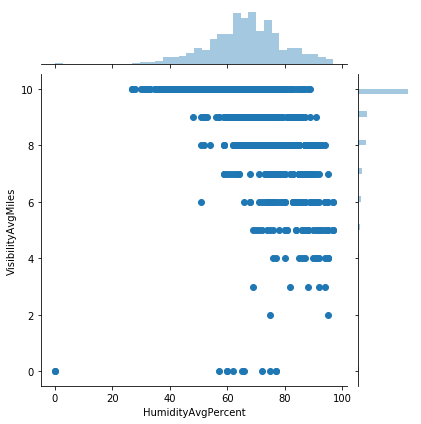

In [12]:
sns.jointplot(x="HumidityAvgPercent", y="VisibilityAvgMiles", data=df, kind="kde");
sns.jointplot(x="HumidityAvgPercent", y="VisibilityAvgMiles", data=df);

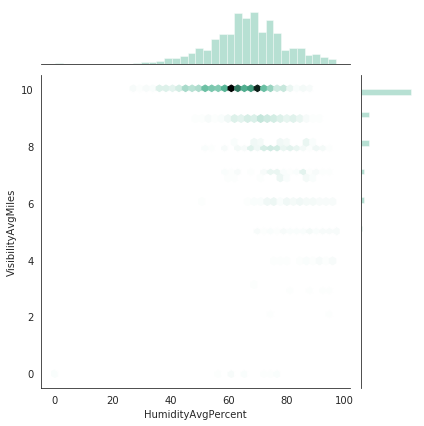

In [20]:
with sns.axes_style("white"):
    sns.jointplot(x="HumidityAvgPercent", y="VisibilityAvgMiles", data = df, kind="hex", color="#4CB391");


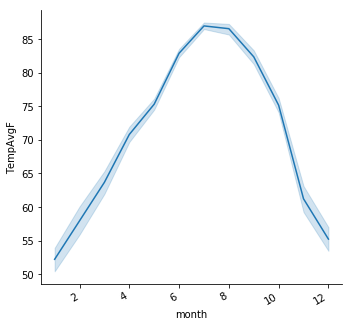

In [28]:
g = sns.relplot(x="month", y="TempAvgF", kind="line", data=df)
g.fig.autofmt_xdate()